In [110]:
from cvxopt.solvers import qp
from cvxopt.base import matrix

import numpy, pylab, random, math
%matplotlib inline

# Why do we care about having a large margin?
Lines that are too close to one class or another class (the positives or negatives), means that you believe in your training data too much. You don't want to believe the data too much, even though its all you have, otherwise you are *overfitting*. Lines that are too close to one of the classes are more likely to overfit. 

Functions which overfit are more complex, so it is interesting to note that the lines which are too close to a particular class are more complex.

This is a good literal interpretation of the words "over" and "fit."


In [111]:
#TODO: Loop and print out all the seperator types
#TODO: Move the data around, print out all the seperator types

# Lines and Hyperplanes
The equation for a line is relatively straightforward:
y = mx+b

The equation for a hyperplane looks like this:
y = w(transpose)x + b

Heres some definitions for this hyperplane equation:
* y: *classification label. *The output which indicates whether you are in the positive or negative class
* w: parameters for the plane
* b: also another parameter, moves it out of the origin

# Kernel Function

**Task:** Implement a suitable kernel function

## Linear Kernel

This is really just a dot product of two vectors (plus one).

K(vec_x, vec_y) = vec_x_transpose * vec_y + 1

In [112]:
#Global Parameters
POWER = 2
RADIAL_OMEGA = 1
SIGMOID_DELTA = 2
SIGMOID_K = 1
SLACK = False
C = .9

In [126]:
def linear_kernel(vec_x, vec_y):
    # Take the dot product and then add one
    return numpy.dot(vec_x, vec_y) + 1
    

In [114]:
#Kernel classes
class kernels:
   def linear(x, y):
       xTrans = numpy.array(x).transpose()
       return xTrans.dot(y) + 1

   def polynomial(x, y):
       return math.pow(kernels.linear(x,y), POWER)

   def radial(x, y):
       xTrans = numpy.array(x).transpose()
       xy  = numpy.subtract(xTrans, y)
       normXY = numpy.linalg.norm(xy)
       return math.exp( -math.pow(normXY,2)/(2*math.pow(RADIAL_OMEGA,2)))

   def sigmoid(x, y):
       xTrans = numpy.array(x).transpose()
       return numpy.tanh(SIGMOID_K*xTrans.dot(y) - SIGMOID_DELTA)

G_KERNEL_FUNCTION = kernels.radial

# Build a P matrix


In [115]:
def build_p_matrix(samples, kernel_fun):
    matrix = []
    x_i = []
    x_j = []
    for i in range(len(samples)):
        row = []
        for j in range(len(samples)):
            P_element = samples[i][2] * samples[j][2] * kernel_fun([samples[i][0], samples[i][1]], 
                                                                   [samples[j][0], samples[j][1]])
            row.append(P_element)
        matrix.append(row)
    return matrix



# Generate Test Data

In [125]:
classA = [(random.normalvariate(-1.5, 1),
          random.normalvariate(0.5, 1),
          1.0)
          for i in range(5)] + \
        [(random.normalvariate(1.5, 1),
         random.normalvariate(0.5, 1),
         1.0)
        for i in range(5)]
    
classB = [(random.normalvariate(0.0, 0.5),
          random.normalvariate(-0.5, 0.5),
          -1.0)
         for i in range(10)]


# def generate_seperable_data(classA, classB):
#     classes = []
#     classes[0] = [(random.normalvariate(0, 1),
#               random.normalvariate(0, 1),
#               1.0)
#               for i in range(1)] + \
#             [(random.normalvariate(0, 1),
#              random.normalvariate(0, 1),
#              1.0)
#             for i in range(1)]

#     classes[1] = [(random.normalvariate(0, -1),
#               random.normalvariate(0, -1),
#               -1.0)
#          for i in range(1)]
#     classes[2] = classes[0] + classes[1]
#     random.shuffle(classes[2])
#     print(classes)
#     return 
# classA = [(0.9965606631942062, -0.5554064756635275, 1.0), (-0.4257474227660285, 0.12027119134640568, 1.0), (1.0685579193865484, 1.7257296825964354, 1.0), (1.045323475199482, -0.8711231251800222, 1.0), (0.549159919939763, 1.5881500878276624, 1.0), (2.0442145407307306, 1.6140637934176618, 1.0), (0.7890087908317421, 0.7036643434254063, 1.0), (0.37179721751008055, 2.1200080907899768, 1.0), (1.3818768555039853, 0.6776276672167125, 1.0), (1.3929594381459929, -0.48048225627197305, 1.0)]
# classB = [(-2.2995482941558283, -1.0700711043993594, -1.0), (-0.2030449660422663, 1.0322082551171978, -1.0), (-2.8795010107069663, 0.05168709419608353, -1.0), (-2.414540711588119, -1.6575303869890203, -1.0), (0.6908965254702872, -0.9827822790074381, -1.0), (-0.5307462629348426, -0.35114912081275895, -1.0), (-0.8721199516085301, -1.580983996797356, -1.0), (-1.743754539812206, 0.3870688986767209, -1.0), (-0.9557368849879198, -1.7059133825957709, -1.0), (0.5517184529744592, -0.8129233391226747, -1.0)]

classB = [(-0.749129952478279, -0.7857358946867714, 1.0), (-1.750343458187756, 0.7646591594145473, 1.0), (-3.412352763936121, -0.3826940863161449, 1.0), (-0.9011129036996118, -0.3881511203916689, 1.0), (-3.0907062804259575, 1.867786733427103, 1.0), (1.8104971494638822, 2.5655631913923043, 1.0), (3.07051968941974, -0.8220109384854184, 1.0), (0.46262454825344945, 1.5889758961671283, 1.0), (0.5018175889261594, 0.5667111050615823, 1.0), (2.0212934228328137, 0.6123438350354439, 1.0)]
classA = [(-0.013268127566058819, -0.41546764732696684, -1.0), (-0.6679306536865377, 0.19683509583314762, -1.0), (0.35163738620084706, -1.4851766562697493, -1.0), (-0.470946116529908, 0.16978975127052776, -1.0), (0.4377477212321783, 0.1219981772899178, -1.0), (0.5549860586749884, -0.28391708864193244, -1.0), (0.392377055782208, -0.8805050838040313, -1.0), (-0.7755512455725297, -0.9459520670571256, -1.0), (-0.49587165786604204, -0.4889861250502649, -1.0), (-0.3381678863310306, -0.8870134372149905, -1.0)]
data = classA + classB
random.shuffle(data)
#Jokull's Data
# data = [(-0.4817775866423481, -0.676196126111814, -1.0), (-1.3746653598765421, -1.2335653503955357, 1.0), (-0.04952991285713326, -0.477259823574604, -1.0), (-2.435302270702021, 0.5791628345129953, 1.0), (-0.23207345925812842, -0.829241385869637, -1.0), (-1.746084907233614, 0.9006137892797217, 1.0), (-0.3698769551877943, 1.9746639924223914, 1.0), (1.3807418306962262, 0.8160567394627515, 1.0), (0.6481506000006643, -0.2993683817580585, -1.0), (0.006408247677090779, -0.711255503088516, -1.0), (-0.3556075093525846, 0.6450331217049499, -1.0), (0.9314091400315766, -0.7871051525340638, -1.0), (0.86816793401546, -0.5298525064359068, 1.0), (-0.04468918689694391, -0.5181337266696356, -1.0), (1.2636537068237677, 1.1427041812767662, 1.0), (0.09043582719932093, 0.04380816810541566, -1.0), (0.012425436725393221, -0.6643420601684578, -1.0), (-2.0485964643706644, 0.6991611363135597, 1.0), (-2.8139016711910467, 0.17553854976255767, 1.0), (1.6300789364960653, 0.3280724548177084, 1.0)]
N = len(data)

# generate_seperable_data(classA, classB)
# print(classA)

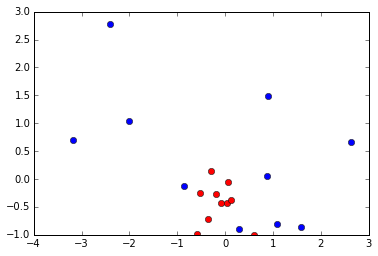

In [117]:
pylab.hold(True)
pylab.plot([p[0] for p in classA],
          [p[1] for p in classA],
          'bo')
pylab.plot([p[0] for p in classB],
          [p[1] for p in classB],
          'ro')
pylab.show()

In [118]:
x_i = []
x_j = []
for sample in data:
    x_i.append(sample[0])
    x_j.append(sample[1])

In [119]:
# q vector is a N long vector with -1's
mQ = matrix([-1.0 for i in range(N)])
# print(mQ)
# h is a vector with all 0's
mH = matrix([0.0 for i in range(N)])
# print(mH)

In [120]:
# the G Matrix is an identity matrix with -1's
mG = (-1)*matrix(numpy.identity(N))

In [121]:
# Make the call to qp
mP = build_p_matrix(data, G_KERNEL_FUNCTION)
mP = matrix(mP)
r = qp(mP, mQ, mG, mH)
a = list(r['x'])
# Set all the alphas close to zero to zero
a = [alpha if (alpha > 0.00001) else 0 for alpha in a]
# print[(alpha < 0.000005) for alpha in a]

     pcost       dcost       gap    pres   dres
 0: -8.9359e+00 -2.6209e+01  2e+01  0e+00  2e+00
 1: -1.5304e+01 -2.2517e+01  7e+00  8e-16  1e+00
 2: -5.0664e+01 -6.2926e+01  1e+01  4e-15  1e+00
 3: -2.6908e+02 -3.0469e+02  4e+01  2e-14  9e-01
 4: -4.4458e+02 -5.2692e+02  8e+01  7e-14  7e-01
 5: -6.4714e+02 -7.6340e+02  1e+02  3e-14  3e-01
 6: -6.8453e+02 -6.9586e+02  1e+01  1e-13  2e-02
 7: -6.8432e+02 -6.8564e+02  1e+00  1e-13  5e-14
 8: -6.8513e+02 -6.8515e+02  2e-02  7e-14  5e-14
 9: -6.8514e+02 -6.8514e+02  2e-04  6e-14  4e-14
Optimal solution found.


In [122]:
# Pick out the close-to-zero's in the alpha vector
# nonzero_alphas = [alpha for alpha in a if (alpha > 0.0005) else 0 for alpha in a]
nonzero_alphas = [alpha for alpha in a if (alpha > 0.0001)]
# for index, sample in enumerate(data):
# #     ifSLACK:
# #         nonzero_datapoints = [sample for sample in data if ((a[index] > 0) and (a[index] < C))]
# #     else: 
#     nonzero_datapoints = [sample for sample in data if (a[index] > 0)]
nonzero_datapoints = []
for index, sample in enumerate(data):
#     print(index)
    if a[index] > 0:
        nonzero_datapoints.append(sample)
    
#     nonzero_datapoints = [sample if (sample*a[index] > 0) else 0]
print(nonzero_datapoints)
print(nonzero_alphas)
# print(a)
# Save the corresponding X_i's (which has a nonzero alpha)
# x_i = [sample if for sample in data]

def indicator(x,y, kernel_function):
    result = 0;
    for i in range(len(nonzero_alphas)):
        t = nonzero_datapoints[i][2]
        a = nonzero_alphas[i]
        k = kernel_function([nonzero_datapoints[i][0], nonzero_datapoints[i][1]],[x,y])
        result = result + (k * t * a)
    return result

print(nonzero_datapoints[2][2])

[(0.9035489546136397, 1.4953163133880374, 1.0), (-2.406087941151193, 2.7719286226606514, 1.0), (0.047580817650692254, -0.4243790620748611, -1.0), (-0.08615394073448801, -0.43138176948398205, -1.0), (0.6129295705619701, -0.9976112624932569, -1.0), (0.30074589208082236, -0.894113562248964, 1.0), (-0.8585278220701754, -0.12171183247961848, 1.0), (1.093083111836234, -0.8093410950764981, 1.0), (0.11961753324296999, -0.37301577633202576, -1.0), (-0.3508898431592127, -0.7101044866932523, -1.0), (-0.5760449898120025, -0.9811474778209366, -1.0)]
[2.5973744741311213, 0.7739614495675142, 0.000750031026144099, 439.5051298521668, 511.2680580080346, 60.640457056669575, 112.95645074869005, 100.30833974128132, 142.22557977772175, 0.0003601299461132648]
-1.0


In [123]:
#generate new datapoints without a class and feed it into the indicator function which already knows about the non
#zero alphas and corresponding datapoints
new_n = len(nonzero_alphas)
xrange = numpy.arange(-4, 4, 0.05)
yrange = numpy.arange(-4, 4, 0.05)


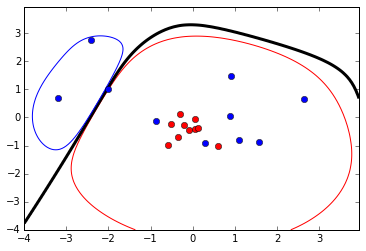

In [124]:


# print(indicator(x_i, x_j, kernels.radial))

grid = matrix([[indicator(x,y,G_KERNEL_FUNCTION)
                for y in yrange]
               for x in xrange]);
# print grid;
pylab.figure(1)
# pylab.subplot(211)
pylab.hold(True)  
pylab.plot([p[0] for p in classA],  
           [p[1] for p in classA],  
           'bo') 
pylab.plot([p[0] for p in classB],  
           [p[1] for p in classB],  
           'ro')  
# pylab.show()  
# pylab.subplot(212)
pylab.contour(xrange, yrange, grid,
              (-1.0, 0.0, 1.0),
              colors = ('red', 'black', 'blue'),
              linewidths = (1, 3, 1));
pylab.show()
